In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time

In [2]:
loan_acc = pd.read_csv(r'C:\Users\Liv\Documents\Python Scripts\appl_accepted_20072019Q3.csv')
loan_acc.head(5)

C:\Users\Liv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,6,19,35,49,59,118,129,130,131,134,135,136,139,144,145,146) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_acc.shape

(2650550, 150)

In [6]:
pd.options.display.max_rows # 판다스에서 최대 몇 열까지 보여줄지 default 값 확인 

60

In [7]:
pd.options.display.max_rows = 1000  # 열이 default인 60개보다 훨씬 많기 때문에 1,000으로 지정

In [6]:
loan_acc.head().T # 변수열이 많으므로 데이터를 보기 쉽도록 .T 이용해서 나열

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [7]:
loan_acc.tail().T

,2650545,2650546,2650547,2650548,2650549
id,153709478,153714644,152956054,153350995,153062400
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,23300,20000,26575,10000,20000
funded_amnt,23300,20000,26575,10000,20000
funded_amnt_inv,23300,20000,26575,10000,20000
term,60 months,60 months,60 months,36 months,60 months
int_rate,22.50%,20.00%,15.24%,8.81%,22.50%
installment,650.17,529.88,635.58,317.12,558.08
grade,D,D,C,A,D
sub_grade,D3,D2,C2,A5,D3


In [3]:
loan_acc = loan_acc.sample(frac = 0.1, replace = True, random_state = 1)

In [4]:
# 결측치가 아닌 값의 개수와 데이터의 종류 보기
loan_acc.info(verbose = True, null_counts = True) # verbose = 출력 정보의 상세 수준을 결정

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265055 entries, 128037 to 2392468
Data columns (total 150 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          265055 non-null  object 
 1   member_id                                   0 non-null       float64
 2   loan_amnt                                   265051 non-null  float64
 3   funded_amnt                                 265051 non-null  float64
 4   funded_amnt_inv                             265051 non-null  float64
 5   term                                        265051 non-null  object 
 6   int_rate                                    265051 non-null  object 
 7   installment                                 265051 non-null  float64
 8   grade                                       265051 non-null  object 
 9   sub_grade                                   265051 non-null  ob

In [5]:
# 결측치 개수와 결측치 비율을 표로 나타내는 함수 만들기

def null_values(loan_acc):
        mis_val = loan_acc.isnull().sum()
        mis_val_percent = 100 * loan_acc.isnull().sum() / len(loan_acc)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(loan_acc.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [6]:
miss_values = null_values(loan_acc) # 결과 : ID를 제외한 모든 행에서 결측치 발견
miss_values.head(20) # 결측치 비율이 가장 높은 변수부터 ... >>> 변수열 삭제 고려

Dataframe has 150 columns.
There are 149 columns that have missing values.


,Missing Values,% of Total Values
member_id,265055,100.0
orig_projected_additional_accrued_interest,264209,99.7
hardship_dpd,263977,99.6
hardship_status,263977,99.6
deferral_term,263977,99.6
hardship_amount,263977,99.6
hardship_start_date,263977,99.6
hardship_end_date,263977,99.6
payment_plan_start_date,263977,99.6
hardship_length,263977,99.6


In [7]:
miss_values.tail(20) # 결측치 비율이 가장 낮은 변수부터 ... >>> 결측치 행 삭제 고려

,Missing Values,% of Total Values
hardship_flag,4,0.0
fico_range_low,4,0.0
loan_amnt,4,0.0
application_type,4,0.0
policy_code,4,0.0
last_fico_range_low,4,0.0
last_fico_range_high,4,0.0
last_pymnt_amnt,4,0.0
collection_recovery_fee,4,0.0
recoveries,4,0.0


In [8]:
loan_acc_drop = loan_acc.dropna(subset = ['loan_amnt']) # loan_amnt에서 결측치가 있는 행 제거하고 새로운 데이터프레임 생성

In [9]:
miss_values = null_values(loan_acc_drop) # loan_amnt 결측치 제거한 뒤 결측치 분포 확인 >>> 결측치 발견 행의 개수가 줄었음.
miss_values.tail(20)

Dataframe has 150 columns.
There are 111 columns that have missing values.


,Missing Values,% of Total Values
total_bal_ex_mort,5002,1.9
mort_acc,5002,1.9
acc_open_past_24mths,5002,1.9
title,2375,0.9
last_pymnt_d,355,0.1
dti,252,0.1
revol_util,203,0.1
pub_rec_bankruptcies,115,0.0
collections_12_mths_ex_med,12,0.0
chargeoff_within_12_mths,12,0.0


In [10]:
# 불필요한 변수들 제거
loan_acc_drop.drop(['id','url','desc','emp_title','zip_code'], axis = 'columns', inplace = True) # 불필요한 변수
loan_acc_drop.drop(['member_id'], axis = 'columns', inplace = True) # 결측치가 너무 많음 
loan_acc_drop

C:\Users\Liv\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128037,35000.0,35000.0,35000.0,60 months,13.99,814.21,C,C4,10+ years,MORTGAGE,...,NaN,NaN,NaN,Y,Dec-2017,ACTIVE,Dec-2017,11750.0,45.0,18.0
491755,10675.0,10675.0,10675.0,60 months,14.08,248.84,C,C3,2 years,RENT,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2568076,7425.0,7425.0,7425.0,36 months,17.74%,267.47,C,C5,6 years,RENT,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
491263,25000.0,25000.0,25000.0,60 months,18.06,635.66,D,D2,2 years,OWN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
836489,15000.0,15000.0,15000.0,60 months,22.35,417.28,D,D5,3 years,MORTGAGE,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33712,16000.0,16000.0,16000.0,36 months,13.18,540.50,C,C3,10+ years,RENT,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1845952,5000.0,5000.0,5000.0,36 months,18.49,182.00,D,D2,10+ years,MORTGAGE,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2151340,20000.0,20000.0,20000.0,60 months,18.06,508.53,D,D2,8 years,MORTGAGE,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
122865,20000.0,20000.0,20000.0,60 months,8.18,407.26,B,B1,6 years,MORTGAGE,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
loan_acc_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,265051.0,15251.143931,9376.351678,500.00,8000.0000,13000.000,20000.0000,40000.00
funded_amnt,265051.0,15246.669509,9374.771943,500.00,8000.0000,13000.000,20000.0000,40000.00
funded_amnt_inv,265051.0,15231.676727,9377.663961,0.00,8000.0000,13000.000,20000.0000,40000.00
installment,265051.0,449.811292,270.716553,15.76,253.0000,380.540,600.6200,1691.28
annual_inc,265051.0,79204.101393,82178.306201,0.00,46873.0000,65000.000,95000.0000,8797500.00
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,1078.0,11560.098256,7801.639421,452.07,5573.4725,10114.385,15743.7025,39746.94
hardship_last_payment_amount,1078.0,192.173571,202.376405,0.01,40.7575,126.910,270.8250,1377.17
settlement_amount,3427.0,5052.224322,3749.916103,142.00,2137.0000,4200.000,6965.0000,22824.00
settlement_percentage,3427.0,47.805212,6.853397,0.20,45.0000,45.000,50.0000,93.99


#### 현재 상태 (loan_status)

In [74]:
loan_acc_drop['loan_status'].value_counts(dropna = False) # 결측치 없음 

Current                                                121251
Fully Paid                                             111484
Charged Off                                             27465
Late (31-120 days)                                       2822
In Grace Period                                          1168
Late (16-30 days)                                         578
Does not meet the credit policy. Status:Fully Paid        190
Does not meet the credit policy. Status:Charged Off        85
Default                                                     8
Name: loan_status, dtype: int64

Text(0, 0.5, '')

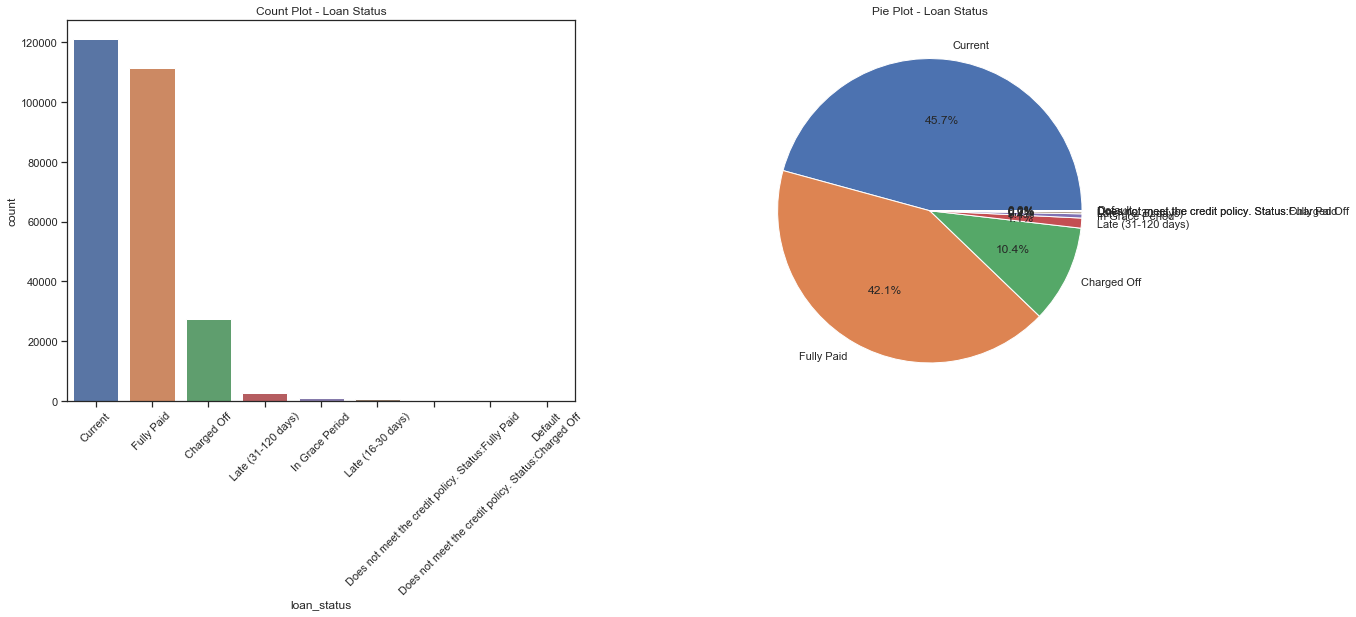

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot('loan_status', data = loan_acc_drop, ax = ax[0], order = loan_acc_drop['loan_status'].value_counts().index)
ax[0].set_title('Count Plot - Loan Status')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45) # x축 라벨은 45도 기울이기

loan_acc_drop['loan_status'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[1], shadow = False)
ax[1].set_title('Pie Plot - Loan Status')
ax[1].set_ylabel('')

#### 대출액 (loan_amnt, funded_amnt, funded_amnt_inv)

Text(0.5, 1.0, 'Total committed by Investors')

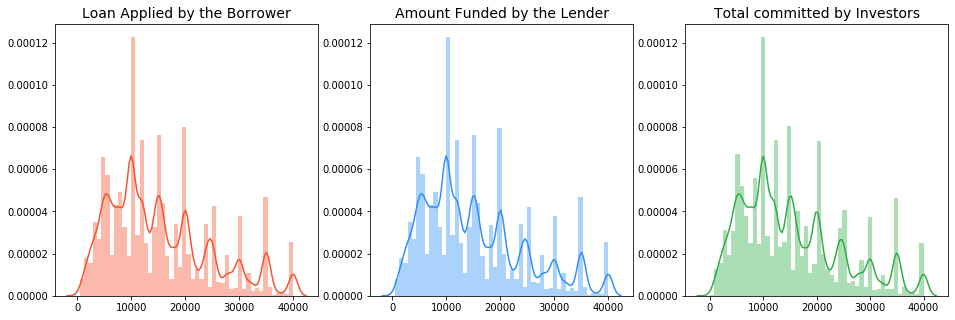

In [15]:
# loan_amnt, funded_amnt, funded_amnt_inv 모두 결측치 처리된 수치형 데이터

fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = loan_acc_drop["loan_amnt"].values # 대출 신청한 금액
funded_amount = loan_acc_drop["funded_amnt"].values # 대출 받은 금액 
investor_funds = loan_acc_drop["funded_amnt_inv"].values # 투자자들에게 대출 받은 금액 

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

# 결과 : 세 변수에서 거의 동일. = 좋은 신용을 가진 사람들은 대출 신청한 금액만큼 대출 받을 수 있었다.

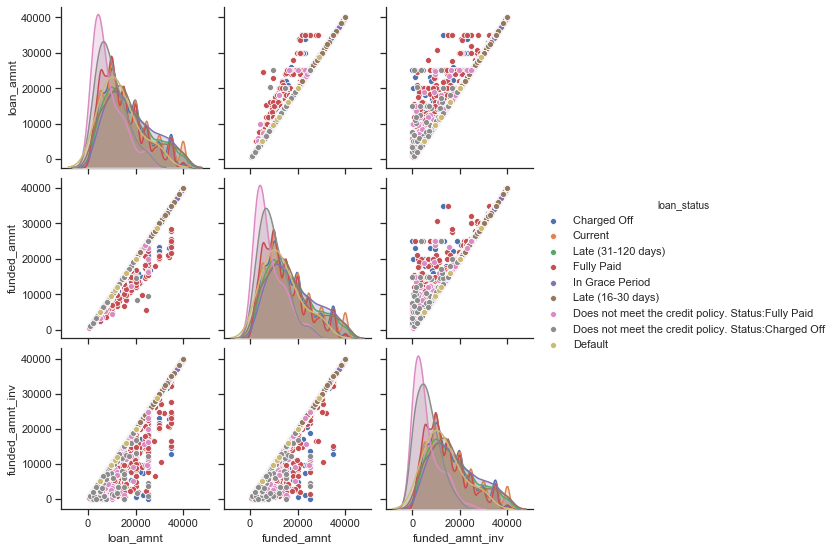

In [85]:
sns.set(style = "ticks")
sns.pairplot(loan_acc_drop, vars = ['loan_amnt','funded_amnt','funded_amnt_inv'], hue = "loan_status")

#### 대출금리 (int_rate)

In [86]:
loan_acc_drop['int_rate'].value_counts(dropna = False) 

11.99    5471
8.19     4811
5.32     4674
13.99    4416
10.99    4379
         ... 
23.91       1
23.59       1
17.15       1
18.61       1
14.25       1
Name: int_rate, Length: 620, dtype: int64

In [20]:
loan_acc_drop['int_rate'].unique() # int_rate에서 일부 값은 숫자가 아닌 문자형이고, 또 다른 일부 값에는 %가 붙어있음. 
# >>> % 없애고 숫자형으로 통일시켜야.

array([13.99, 14.08, '17.74%', 18.06, 22.35, '14.74%', 17.57, 12.49,
       '14.47%', 12.39, 15.05, 24.5, '13.08%', 9.75, 10.91, 8.08, 12.99,
       15.02, 16.99, 16.55, 7.39, '6.46%', 20.5, 8.39, 7.49, 11.53, 6.72,
       6.89, '11.71%', 9.67, 14.65, 7.89, 5.32, '12.40%', 9.93, 20.99,
       11.99, 14.99, '10.33%', 15.99, 12.62, 16.29, 8.38, 21.45, 13.49,
       25.29, 6.24, 5.31, 6.99, 17.09, 18.24, 9.43, 14.07, 9.16, 10.42,
       11.14, '10.72%', 15.61, '28.80%', 19.03, 19.52, 13.56, 8.9, 13.44,
       18.99, 18.25, '20.00%', 16.14, 6.46, 6.08, 13.67, 10.47, 7.69,
       10.64, '11.80%', 10.49, 13.33, 5.99, 16.46, 22.91, 22.9, 7.26,
       '8.19%', '18.94%', '15.24%', 21.99, 12.12, 10.99, 14.09, '14.30%',
       21.49, 11.44, 26.31, 19.92, 9.49, 16.59, 12.79, '22.50%', '8.81%',
       '17.97%', 15.8, '11.02%', 21.18, 10.75, 30.84, 7.46, 12.29,
       '13.90%', 23.99, 11.49, 30.17, '13.56%', '20.55%', 6.97, 19.99,
       13.66, 8.18, 11.05, 11.47, 12.74, 28.72, 21.85, 7.21, 12.69, 1

In [30]:
for i in range(len(loan_acc_drop)) :
    a = loan_acc_drop[i:i+1]['int_rate'].tolist()
    if type(a[0]) == float :        # 숫자형은 그대로
        pass
    if type(a[0]) == str :          # 문자형은 %를 제거
        loan_acc_drop.iloc[i, 4] = a[0].replace('%', '')
loan_acc_drop['int_rate'] = pd.to_numeric(loan_acc_drop['int_rate']) # 숫자형으로 바꾸기

C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [31]:
loan_acc_drop['int_rate'].unique()

array([13.99, 14.08, 17.74, 18.06, 22.35, 14.74, 17.57, 12.49, 14.47,
       12.39, 15.05, 24.5 , 13.08,  9.75, 10.91,  8.08, 12.99, 15.02,
       16.99, 16.55,  7.39,  6.46, 20.5 ,  8.39,  7.49, 11.53,  6.72,
        6.89, 11.71,  9.67, 14.65,  7.89,  5.32, 12.4 ,  9.93, 20.99,
       11.99, 14.99, 10.33, 15.99, 12.62, 16.29,  8.38, 21.45, 13.49,
       25.29,  6.24,  5.31,  6.99, 17.09, 18.24,  9.43, 14.07,  9.16,
       10.42, 11.14, 10.72, 15.61, 28.8 , 19.03, 19.52, 13.56,  8.9 ,
       13.44, 18.99, 18.25, 20.  , 16.14,  6.08, 13.67, 10.47,  7.69,
       10.64, 11.8 , 10.49, 13.33,  5.99, 16.46, 22.91, 22.9 ,  7.26,
        8.19, 18.94, 15.24, 21.99, 12.12, 10.99, 14.09, 14.3 , 21.49,
       11.44, 26.31, 19.92,  9.49, 16.59, 12.79, 22.5 ,  8.81, 17.97,
       15.8 , 11.02, 21.18, 10.75, 30.84,  7.46, 12.29, 13.9 , 23.99,
       11.49, 30.17, 20.55,  6.97, 19.99, 13.66,  8.18, 11.05, 11.47,
       12.74, 28.72, 21.85,  7.21, 12.69, 19.2 , 20.75, 13.58,  9.44,
       15.31,  6.03,

Text(0.5, 1.0, 'Interest Rate Distribuition')

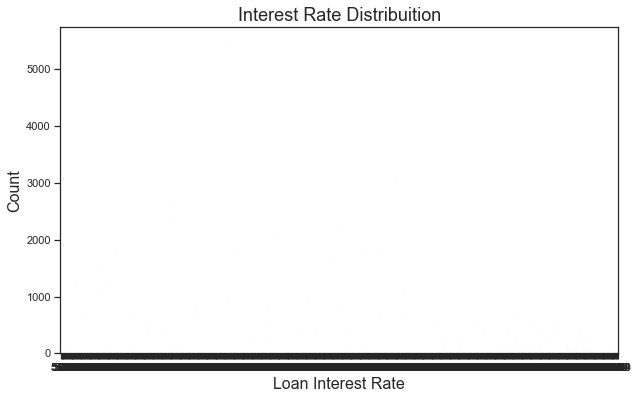

In [87]:
# 이자율 그래프 --- 그리려 하면 수치형이 아니라는 오류 뜸 .
plt.figure(figsize=(10,6))
g = sns.countplot(x = "int_rate", data = loan_acc_drop, color = 'red')
g.set_xlabel("Loan Interest Rate", fontsize = 16)
g.set_ylabel("Count", fontsize = 16)
g.set_title("Interest Rate Distribuition", fontsize = 18)

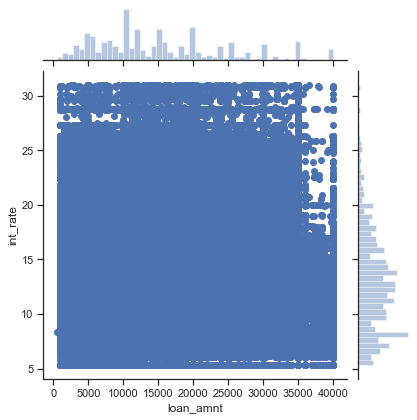

In [88]:
# 대출액과 이자율 사이의 관계 
sns.jointplot(x = 'loan_amnt', y = "int_rate", data = loan_acc_drop, kind = 'scatter')

#### 대출등급 (grade, sub_grade)

In [76]:
loan_acc_drop['grade'].value_counts(dropna = False) # 결측치 없음 

B    77859
C    73912
A    55995
D    38058
E    13767
F     4251
G     1209
Name: grade, dtype: int64

In [77]:
loan_acc_drop['sub_grade'].value_counts(dropna = False) # 결측치 없음

B4    16874
C1    16620
B5    16334
B3    14973
B2    14908
B1    14770
C3    14769
C2    14733
C4    14261
C5    13529
A4    13455
A5    13428
A1    11244
D1     9399
D2     9372
A3     9027
A2     8841
D3     7540
D4     6329
D5     5418
E1     3386
E2     3034
E3     2709
E5     2339
E4     2299
F1     1362
F2      958
F3      805
F4      597
F5      529
G1      396
G2      259
G3      206
G4      190
G5      158
Name: sub_grade, dtype: int64

Text(0.5, 1.0, 'Count Plot - Subgrade')

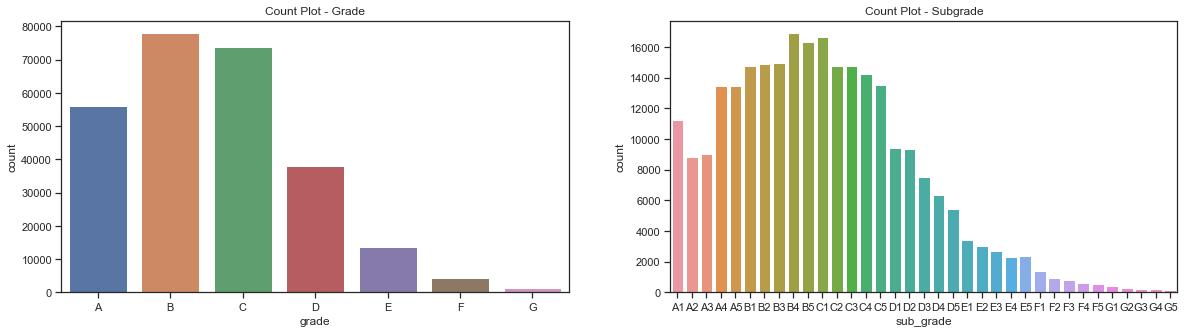

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot('grade', data = loan_acc_drop, order = ["A","B","C","D","E","F","G"], ax = ax[0]) # 일반등급(grade)의 분포
ax[0].set_title('Count Plot - Grade') # 일반등급
sns.countplot('sub_grade', data = loan_acc_drop, order = ["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5","C1","C2","C3","C4","C5","D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5","G1","G2","G3","G4","G5"], ax = ax[1]) # 세부등급(subgrade)의 분포
ax[1].set_title('Count Plot - Subgrade') # 세부등급

Text(0, 0.5, 'Loan Amount')

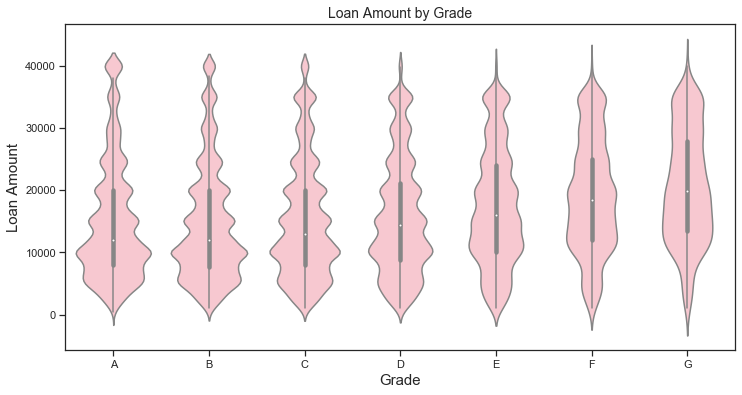

In [79]:
# 대출등급에 따른 대출액 비교
fig = plt.figure(figsize = (12,6))
sns.violinplot("grade", "loan_amnt", data = loan_acc_drop, color = 'pink', order = ["A","B","C","D","E","F","G"])
plt.title("Loan Amount by Grade", fontsize = 14)
plt.xlabel("Grade", fontsize = 15)
plt.ylabel("Loan Amount", fontsize = 15)
# 결과 : 높은 등급일수록 대출액이 적다.

Text(0, 0.5, 'Interest Rate')

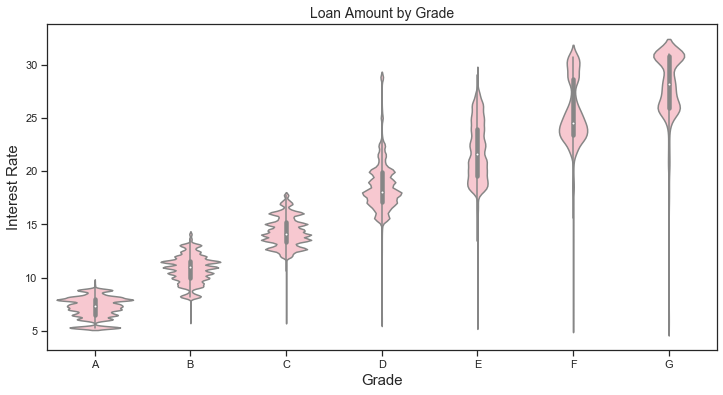

In [80]:
# 대출등급에 따른 대출액 비교
fig = plt.figure(figsize = (12,6))
sns.violinplot("grade", "int_rate", data = loan_acc_drop, color = 'pink', order = ["A","B","C","D","E","F","G"])
plt.title("Loan Amount by Grade", fontsize = 14)
plt.xlabel("Grade", fontsize = 15)
plt.ylabel("Interest Rate", fontsize = 15)
# 결과 : 높은 등급일수록 대출액이 적다.

Text(0.5, 1.0, 'Loan Amount Distribution by Sub Grade')

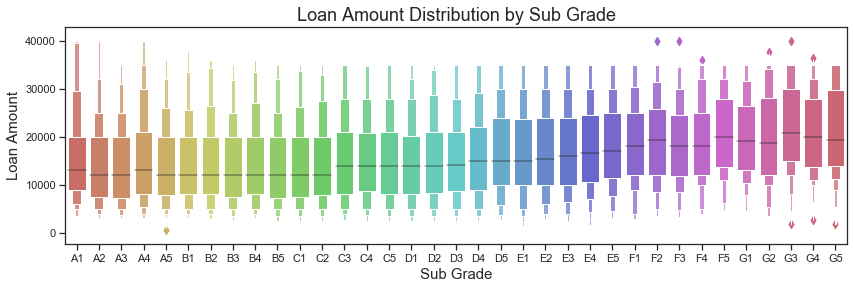

In [81]:
# 세부등급에 따른 대출액
fig = plt.figure(figsize = (14,4))
order_sub = loan_acc_drop.groupby("sub_grade")['loan_amnt'].count().index # 정렬
g = sns.boxenplot(x = "sub_grade", y = "loan_amnt", data = loan_acc_drop, palette="hls", order = order_sub)
g.set_xlabel("Sub Grade", fontsize = 15)
g.set_ylabel("Loan Amount", fontsize = 15)
g.set_title("Loan Amount Distribution by Sub Grade", fontsize = 18)

Text(0.5, 1.0, 'Interest Rate Distribution by Sub Grade')

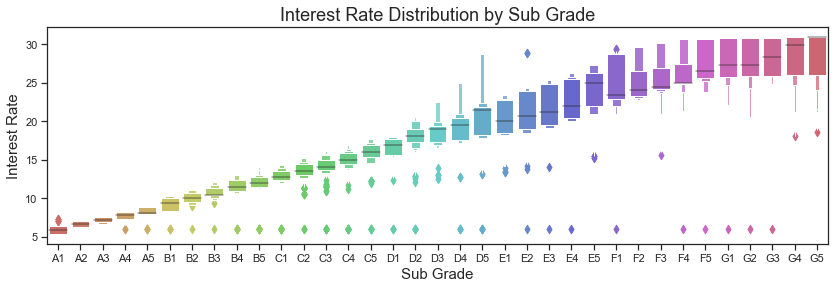

In [82]:
# 세부등급에 따른 대출액
fig = plt.figure(figsize = (14,4))
order_sub = loan_acc_drop.groupby("sub_grade")['int_rate'].count().index
g = sns.boxenplot(x = "sub_grade", y = "int_rate", data = loan_acc_drop, palette="hls", order = order_sub)
g.set_xlabel("Sub Grade", fontsize = 15)
g.set_ylabel("Interest Rate", fontsize = 15)
g.set_title("Interest Rate Distribution by Sub Grade", fontsize = 18)
# 결과 !

In [83]:
# 크로스탭: loan_status와 grade의 관계

status_grade = ['loan_status', 'grade']
cm = sns.light_palette("purple", as_cmap = True)
pd.crosstab(loan_acc_drop[status_grade[0]], loan_acc_drop[status_grade[1]]).style.background_gradient(cmap = cm)

# 결과 : Charged Off, Current에서 A~G등급별 차이가 확연하다.

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,1492,5482,8736,6210,3618,1456,471
Current,30972,36029,33106,16049,4004,856,235
Default,1,1,2,3,1,0,0
Does not meet the credit policy. Status:Charged Off,2,8,18,20,16,16,5
Does not meet the credit policy. Status:Fully Paid,9,22,42,57,34,14,12
Fully Paid,23157,35306,30434,14598,5724,1820,445
In Grace Period,105,257,406,294,83,14,9
Late (16-30 days),46,127,196,139,54,13,3
Late (31-120 days),211,627,972,688,233,62,29


#### 대출금 상환 횟수 (term)

In [16]:
loan_acc_drop['term'].value_counts(dropna = False)

 36 months    187012
 60 months     78039
Name: term, dtype: int64

Text(0, 0.5, '')

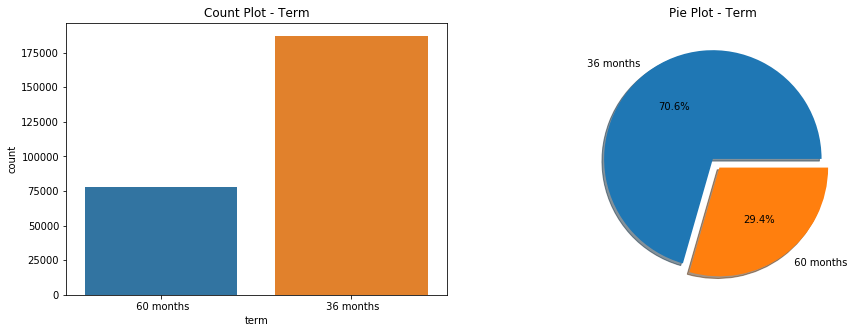

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot('term', data = loan_acc_drop, ax = ax[0])
ax[0].set_title('Count Plot - Term')

loan_acc_drop['term'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[1].set_title('Pie Plot - Term')
ax[1].set_ylabel('')

In [18]:
# 대출상품의 기간에 따른 대출액 합계
term_to_loan_amount_dic = {}
unique_term = loan_acc_drop["term"].unique()
for term in unique_term:
   loan_amount_sum = loan_acc_drop.loc[loan_acc_drop["term"] == term, "loan_amnt"].sum()
   term_to_loan_amount_dic[term] = loan_amount_sum
term_to_loan_amount_dic

{' 60 months': 1631972375.0, ' 36 months': 2410358575.0}

Text(0.5, 1.0, 'Lending Club Loan \nLoan Amount Distribution by Term Values')

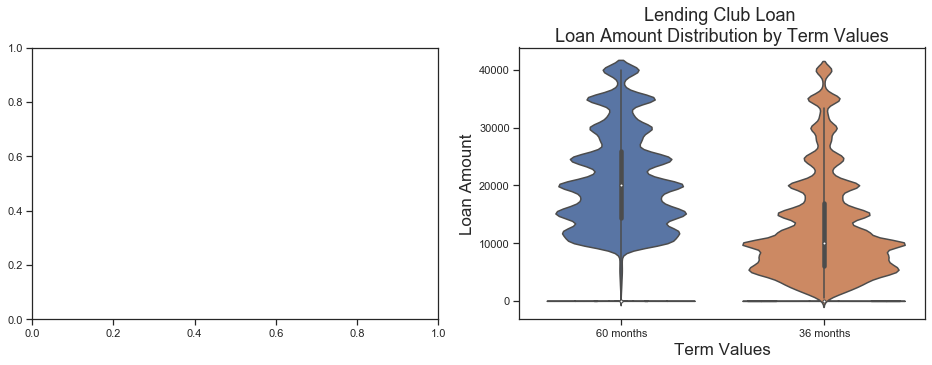

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

# 대출 기간과 이자율의 관계
g = sns.violinplot(x = 'term', y = "int_rate", data = loan_acc_drop)
g.set_xlabel("Term Values", fontsize = 17)
g.set_ylabel("Interest Rate", fontsize = 17)
g.set_title("Lending Club Loan \nInterest Rate Distribution by Term Values", fontsize = 18)

# 대출 기간과 대출액의 관계 >>> 기간이 긴 상품에서 대출액이 높은 경향
g1 = sns.violinplot(x = "term", y = "loan_amnt", data = loan_acc_drop)
g1.set_xlabel("Term Values", fontsize = 17)
g1.set_ylabel("Loan Amount", fontsize = 17)
g1.set_title("Lending Club Loan \nLoan Amount Distribution by Term Values", fontsize = 18)

#### 대출 실행 날짜 (issue_d)

In [64]:
loan_acc_drop['issue_d'].value_counts(dropna = False) # 월 - 년도 형식임을 알 수 있음; 19년도는 두자리수만

Mar-2016    6271
Jul-19      5103
Oct-2015    4909
Aug-19      4745
Jul-2015    4727
            ... 
Jul-2007       6
Nov-2007       5
Sep-2007       3
Sep-2008       3
Jun-2007       2
Name: issue_d, Length: 148, dtype: int64

In [97]:
loan_acc_drop['issue_d'].isnull().sum() # 결측치 없음

0

In [65]:
def change_year(x):    # 2019년도에 해당하는 데이터는 형태를 바꿔주기
    if x == 'Jan-19' :
        return 'Jan-2019'
    elif x == 'Feb-19' :
        return 'Feb-2019'
    elif x == 'Mar-19' :
        return 'Mar-2019'
    elif x == 'Apr-19' :
        return 'Apr-2019'
    elif x == 'May-19' :
        return 'May-2019'
    elif x == 'Jun-19' :
        return 'Jun-2019'
    elif x == 'Jul-19' :
        return 'Jul-2019'
    elif x == 'Aug-19' :
        return 'Aug-2019'
    elif x == 'Sep-19' :
        return 'Sep-2019'
    else : return x
    
loan_acc_drop['issue_d'] = loan_acc_drop['issue_d'].apply(change_year)

C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
# issue_d 데이터에서 년도만 추출하는 함수를 써서 year 변수 생성
dt_series = pd.to_datetime(loan_acc_drop['issue_d'])
loan_acc_drop['year'] = dt_series.dt.year

C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Issuance of Loans')

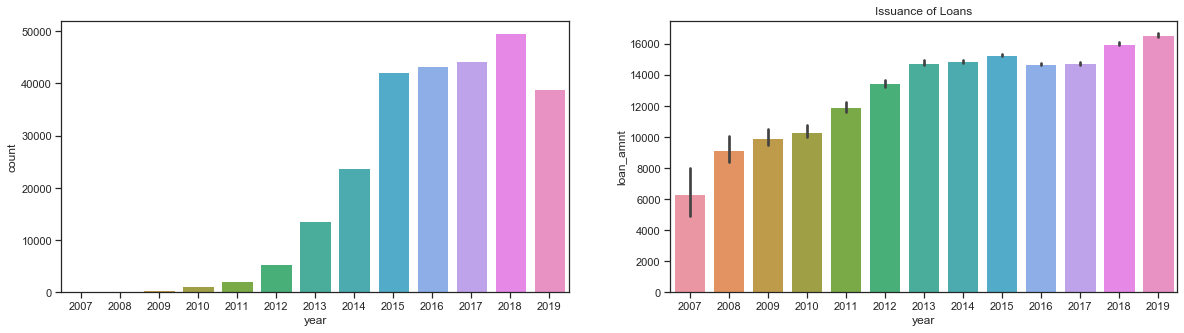

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# 년도에 따른 대출 건수는 점점 증가하는 추세
sns.countplot('year', data = loan_acc_drop, ax = ax[0])

# 년도에 따른 대출액 또한 상승하는 추세
sns.barplot('year', 'loan_amnt', data = loan_acc_drop, ax = ax[1])
ax[1].set_title('Issuance of Loans')

#### 재직현황 (emp_length, emp_title)

In [92]:
loan_acc['emp_title'].describe() # unique 값이 너무 많아서 삭제했던 변수.

count      242503
unique      87071
top       Teacher
freq         4640
Name: emp_title, dtype: object

In [93]:
sns.countplot('emp_title', data = loan_acc) # 간단히 살펴보면 

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000183DBB23798> (for post_execute):


KeyboardInterrupt: 

In [94]:
loan_acc_drop['emp_length'].value_counts(dropna = False) # emp_length 재직기간 현황

10+ years    86254
2 years      24030
< 1 year     23810
3 years      20980
NaN          18218
1 year       17509
5 years      16458
4 years      16139
6 years      11856
7 years      10502
8 years      10481
9 years       8814
Name: emp_length, dtype: int64

In [95]:
# 재직기간을 수치형으로 바꾼 열 생성

lst = [loan_acc_drop]
loan_acc_drop['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5     # 1년 미만은 0.5로 취급

C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Liv\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
loan_acc_drop['emp_length_int'].value_counts(dropna = False)

10.0    86254
2.0     24030
0.5     23810
3.0     20980
NaN     18218
1.0     17509
5.0     16458
4.0     16139
6.0     11856
7.0     10502
8.0     10481
9.0      8814
Name: emp_length_int, dtype: int64

In [98]:
loan_acc_drop['emp_length_int'].fillna(value = 0, inplace = True) # 결측치는 재직기간이 0년인 것으로 파악하여 0으로 대체

C:\Users\Liv\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0.5, 1.0, 'Issuance of Loans')

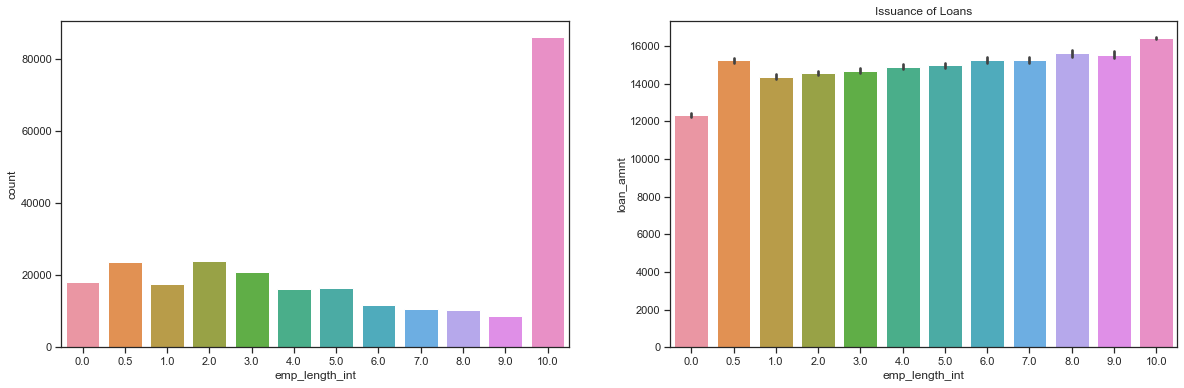

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# 대출자의 재직기간 현황을 그래프로 나타낸 것 >>> 10년 이상 재직한 사람이 가장 많음
sns.countplot('emp_length_int', data = loan_acc_drop, ax = ax[0])

# 년도에 따른 대출액 또한 상승하는 추세 >>> 재직기간과 대출금액은 대체로 정비례. 10년 이상에서 가장 큰 증가
sns.barplot('emp_length_int', 'loan_amnt', data = loan_acc_drop, ax = ax[1])
ax[1].set_title('Issuance of Loans')

#### 개인/공동 대출 여부 (application_type)

In [113]:
loan_acc_drop['application_type'].value_counts(dropna = False) # 결측치 없음

Individual    247700
Joint App      17351
Name: application_type, dtype: int64

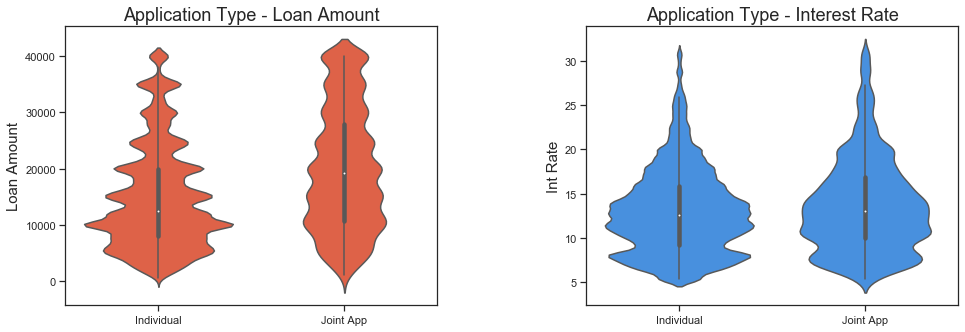

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
 
# 개인/공통 여부와 대출액의 관계 >>> 공동이면 대출액이 증가하는 경향    
g = sns.violinplot(x = "application_type", y = "loan_amnt", data = loan_acc_drop, color = "#F7522F", ax = ax[0])
g.set_title("Application Type - Loan Amount", fontsize = 18)
g.set_xlabel("", fontsize = 15)
g.set_ylabel("Loan Amount", fontsize = 15)

# 개인/공통 여부와 이자의 관계 
g1 = sns.violinplot(x = "application_type", y = "int_rate", data = loan_acc_drop, color = "#2F8FF7", ax = ax[1])
g1.set_title("Application Type - Interest Rate", fontsize = 18)
g1.set_xlabel("", fontsize = 15)
g1.set_ylabel("Int Rate", fontsize = 15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4, top = 0.9)

#### 연간 소득, 집 소유 여부 (annual_inc, verification_status, home_ownership)

In [107]:
loan_acc_drop['annual_inc'].describe() # annual_inc : 연간 소득

count    2.650510e+05
mean     7.920410e+04
std      8.217831e+04
min      0.000000e+00
25%      4.687300e+04
50%      6.500000e+04
75%      9.500000e+04
max      8.797500e+06
Name: annual_inc, dtype: float64

In [104]:
loan_acc_drop['annual_inc'].isnull().sum() # 결측치 없음

0

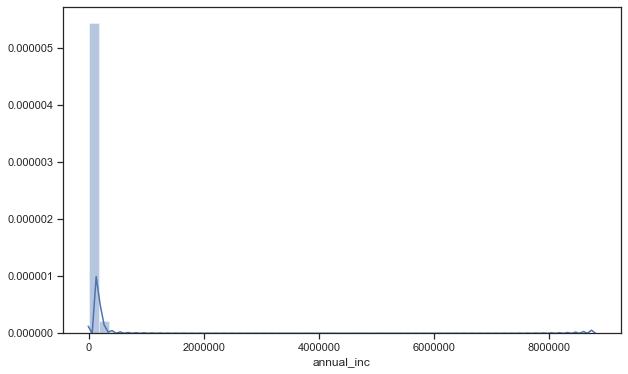

In [109]:
f, ax = plt.subplots(figsize = (10, 6)) 
f = sns.distplot(loan_acc_drop['annual_inc'])

In [13]:
loan_acc_drop['verification_status'].value_counts(dropna = False) # 소득 확인 여부 - 결측치 없음

Source Verified    104163
Not Verified        92032
Verified            68856
Name: verification_status, dtype: int64

Text(0, 0.5, '')

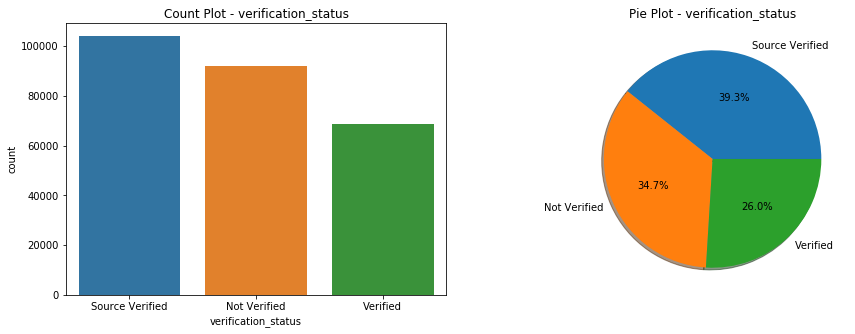

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot('verification_status', data = loan_acc_drop, ax = ax[0])
ax[0].set_title('Count Plot - verification_status')

loan_acc_drop['verification_status'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[1].set_title('Pie Plot - verification_status')
ax[1].set_ylabel('')

In [110]:
loan_acc_drop['home_ownership'].value_counts(dropna = False) # 주택 소유 상태 - 결측치 없음

MORTGAGE    129879
RENT        104838
OWN          29969
ANY            343
OTHER           17
NONE             5
Name: home_ownership, dtype: int64

Text(0, 0.5, 'Loan Amount')

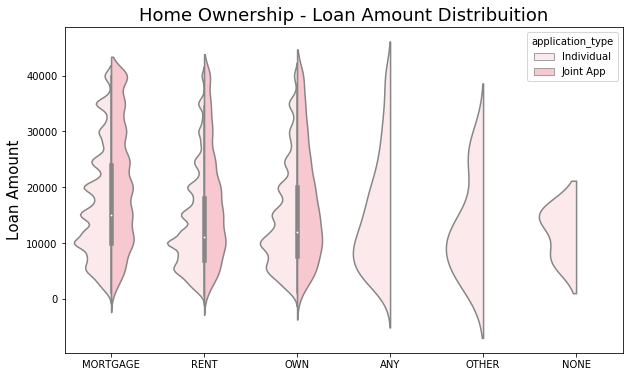

In [16]:
plt.figure(figsize = (10,6))
# 집 소유 여부, 개인/공동 대출 여부, 대출액의 관계
g = sns.violinplot(x = 'home_ownership', y = 'loan_amnt', data = loan_acc_drop, kind="violin", split = True, color = 'pink', hue = "application_type")
g.set_title("Home Ownership - Loan Amount Distribuition", fontsize = 18)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

#### 월상환금액 (Installment)

In [18]:
loan_acc_drop['installment'].value_counts(dropna = False)

301.15     4423
361.38     4332
332.10     4153
314.25     3674
1225.24    3615
           ... 
60.74         1
60.51         1
1230.50       1
1317.26       1
512.00        1
Name: installment, Length: 97003, dtype: int64

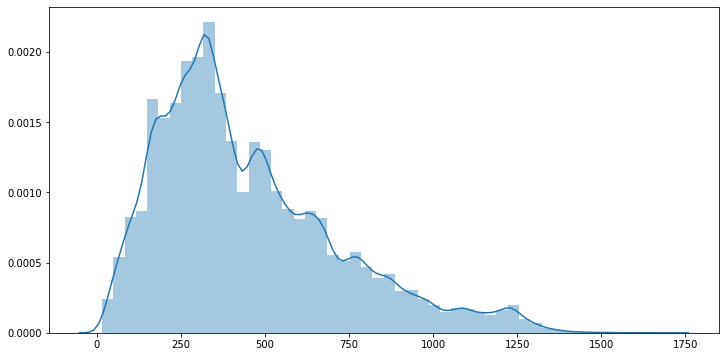

In [23]:
# 월상환금액의 분포 : 300 부근에서 가장 높은 수치
fig = plt.figure(figsize = (12,6))
sns.distplot(loan_acc_drop["installment"].values) 

Text(0.5, 1.0, 'Installment Distribution by Loan Status')

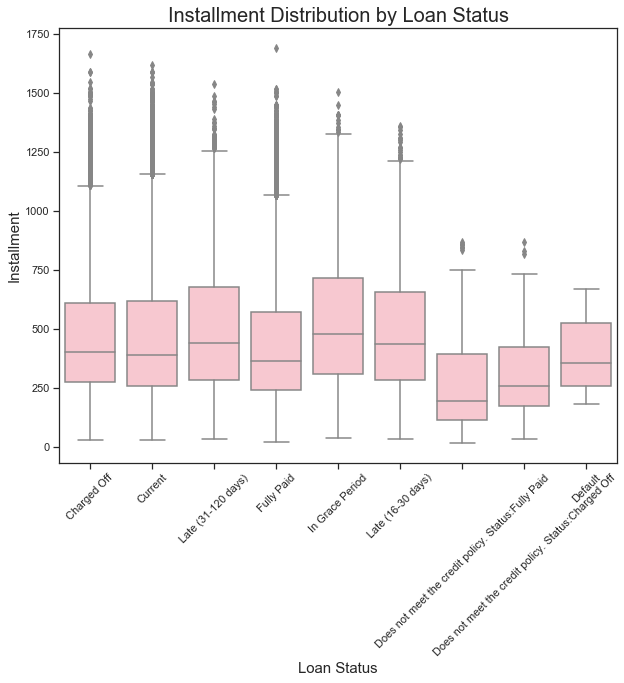

In [112]:
# 월상환금액과 대출상태의 관계
fig = plt.figure(figsize = (10,8))
g = sns.boxplot(x = 'loan_status', y = "installment",
                   data = loan_acc_drop, color = 'pink')
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_xlabel("Loan Status", fontsize = 15)
g.set_ylabel("Installment", fontsize = 15)
g.set_title("Installment Distribution by Loan Status", fontsize = 20)
# 결과 : 

#### 대출 목적 (purpose)

In [117]:
loan_acc_drop['purpose'].value_counts(dropna = False) # 결측치 없음

debt_consolidation    148667
credit_card            62477
home_improvement       17507
other                  16255
major_purchase          5740
medical                 3141
small_business          2814
car                     2700
vacation                1851
moving                  1750
house                   1712
wedding                  222
renewable_energy         179
educational               36
Name: purpose, dtype: int64

Text(0, 0.5, '')

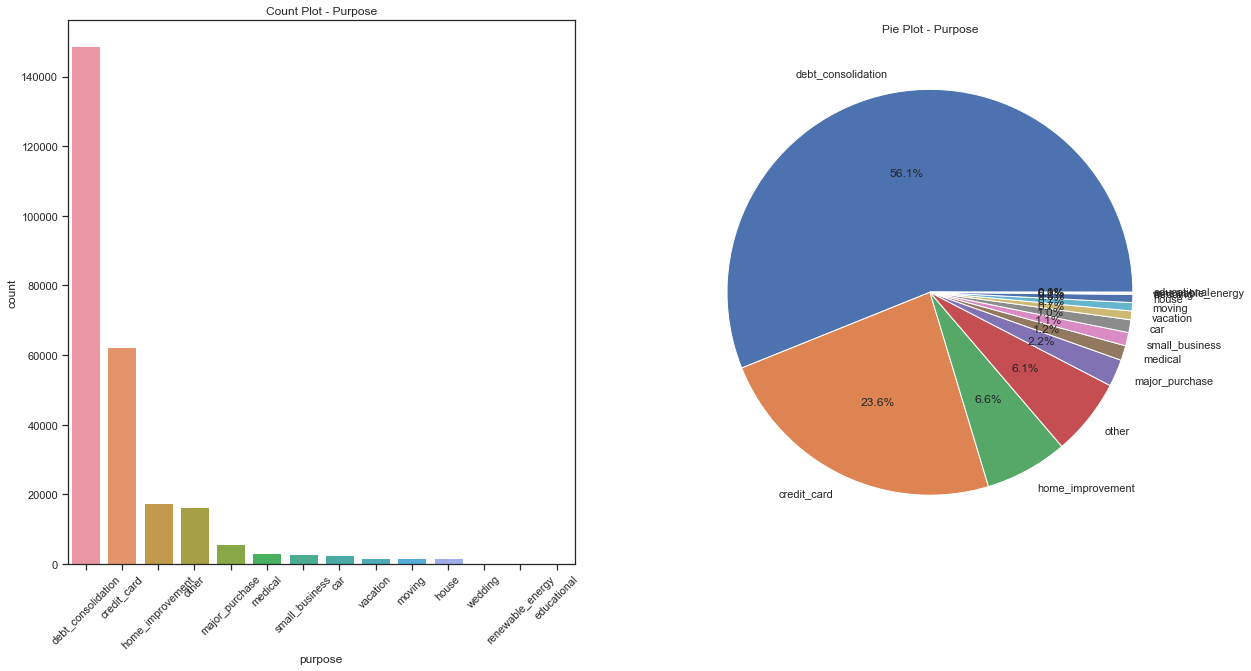

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot('purpose', data = loan_acc_drop, ax = ax[0], order = loan_acc_drop['purpose'].value_counts().index)
ax[0].set_title('Count Plot - Purpose')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45) # x축 라벨은 45도 기울이기

loan_acc_drop['purpose'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[1], shadow = False)
ax[1].set_title('Pie Plot - Purpose')
ax[1].set_ylabel('')

# 결과 : 가장 큰 대출 목적은 debt consolidation, credit card. 

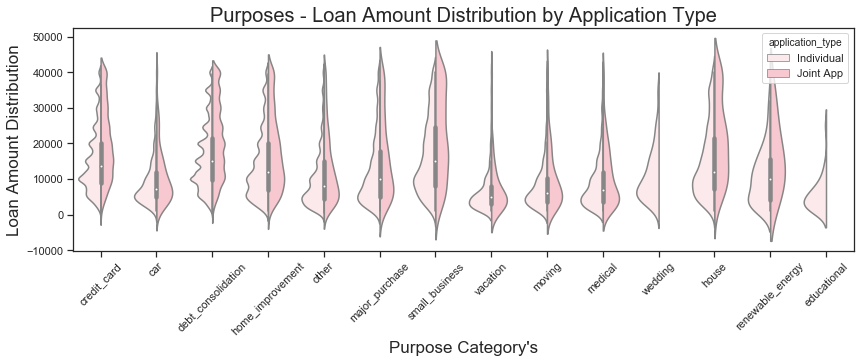

In [121]:
plt.figure(figsize = (14,4))
# 대출 목적, 개인/공통 대출 여부, 대출액의 관계
g1 = sns.violinplot(x = "purpose", y = "loan_amnt", data = loan_acc_drop, hue = "application_type", split = True, color = 'pink')
g1.set_xticklabels(g1.get_xticklabels(), rotation = 45)
g1.set_title("Purposes - Loan Amount Distribution by Application Type", fontsize = 20)
g1.set_xlabel("Purpose Category's", fontsize = 17)
g1.set_ylabel("Loan Amount Distribution", fontsize = 17)

#### 대출자 거주지역 (addr_state)

In [122]:
loan_acc_drop['addr_state'].unique()

array(['LA', 'TN', 'CA', 'NY', 'AZ', 'FL', 'MI', 'IN', 'NJ', 'MD', 'NC',
       'GA', 'VA', 'MO', 'CO', 'WI', 'OH', 'CT', 'ND', 'IL', 'WA', 'MA',
       'NV', 'OK', 'TX', 'NE', 'MN', 'DE', 'KY', 'NM', 'PA', 'KS', 'AL',
       'RI', 'AK', 'ME', 'NH', 'MS', 'SC', 'HI', 'OR', 'WV', 'SD', 'UT',
       'MT', 'VT', 'WY', 'ID', 'AR', 'DC', 'IA'], dtype=object)

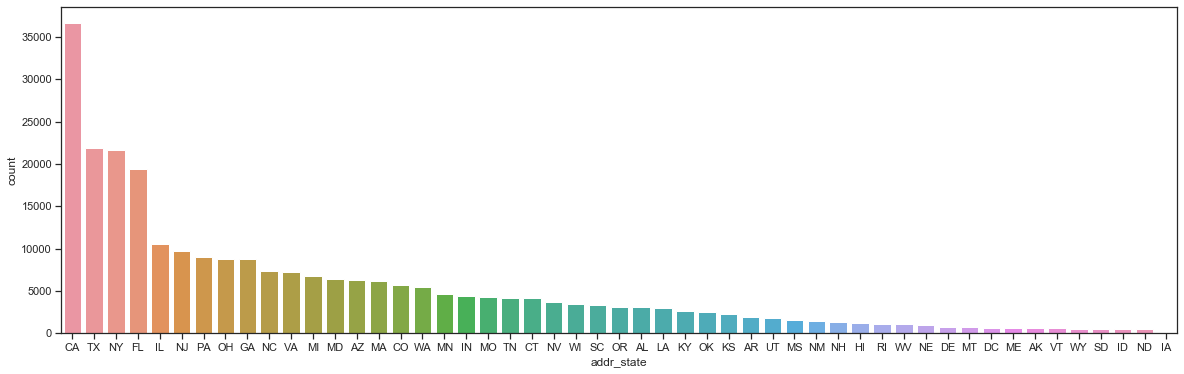

In [123]:
fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.countplot('addr_state', data = loan_acc_drop, order = loan_acc_drop['addr_state'].value_counts().index)
# 결과: California, Texas, New York, Florida에서 대출 건수 많음.

In [124]:
# 54개의 주를 west, south west, mid west, south east, north east 로 분류
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

loan_acc_drop['state_cat'] = np.nan 

def finding_regions(state):
    if state in west:
        return 'W'
    elif state in south_west:
        return 'SW'
    elif state in south_east:
        return 'SE'
    elif state in mid_west:
        return 'MW'
    elif state in north_east:
        return 'NE'
    
loan_acc_drop['state_cat'] = loan_acc_drop['addr_state'].apply(finding_regions)

C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, '')

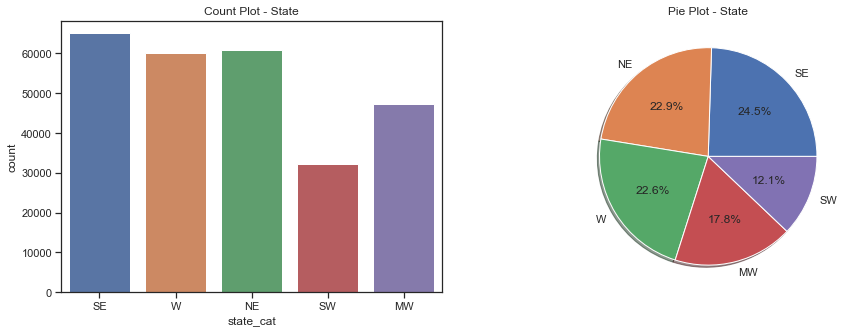

In [125]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.countplot('state_cat', data = loan_acc_drop, ax = ax[0])
ax[0].set_title('Count Plot - State')

loan_acc_drop['state_cat'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[1].set_title('Pie Plot - State')
ax[1].set_ylabel('')

KeyboardInterrupt: 

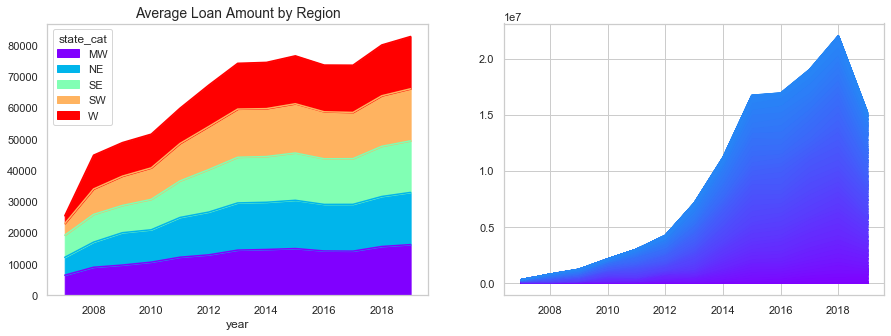

In [126]:
sns.set_style('whitegrid') # 바탕색 흰색
cmap = plt.cm.rainbow # colormap의 색 지정
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# 시간의 흐름에 따른 지역별 대출액
by_loan_amnt = loan_acc_drop.groupby(['year', 'state_cat']).loan_amnt.mean()
by_loan_amnt.unstack().plot(kind = 'area', stacked = True, colormap = cmap, grid = False, legend = True, ax = ax[0])
ax[0].set_title('Average Loan Amount by Region', fontsize = 14)

# 시간의 흐름에 따른 지역별 소득
by_annual_income = loan_acc_drop.groupby(['year', 'annual_inc']).annual_inc.mean()
by_annual_income.unstack().plot(kind = 'area', stacked = True, colormap = cmap, grid = False, legend = True, ax = ax[1])
ax[1].set_title('Average Annual Income by Region', fontsize = 14)

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [127]:
import folium

In [128]:
# 지도를 불러오기 위한 함수
map_osm = folium.Map(location = [45.5236, -122.6750], zoom_start = 5) # zoom = 확대된 정도 조절
map_osm

In [131]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) # 돌렸을 때 하단에 빨간 경고창 안 뜨게 하는 방법
state_geo = r'C:\Users\Liv\Documents\Python Scripts\us-states.json' #json 미국지도 파일 저장하고 불러오기
map = folium.Map(location = [40, -98], zoom_start = 4)
map.choropleth(geo_data = state_geo, data = loan_acc_drop, # 미국 state map 위에 loan_acc 데이터 표시
              columns = ['addr_state', 'loan_amnt'], # 표시할 데이터는 주에 따른 대출액
              key_on = 'feature.id',
              fill_color = 'YlGn', # 색 지정
              legend_name = 'Loan Amount by State')
map

In [134]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
state_geo = r'C:\Users\Liv\Documents\Python Scripts\us-states.json'
map = folium.Map(location = [40, -98], zoom_start = 4)
map.choropleth(geo_data = state_geo, data = loan_acc_drop,
              columns = ['addr_state', 'dti'], # 주에 따른 debt-to-income ratip (총부채 상환 비율)
              key_on = 'feature.id',
              fill_color = 'YlGn',
              legend_name = 'Loan Amount by State')
map

#### 연체 중인 계좌 수 (acc_now_delinq)

In [171]:
loan_acc_drop['acc_now_delinq'].value_counts(dropna = False)

0.0    264162
1.0       887
Name: acc_now_delinq, dtype: int64

In [143]:
loan_acc_drop = loan_acc_drop.dropna(subset = ['acc_now_delinq']) # 결측치가 있는 행 제거

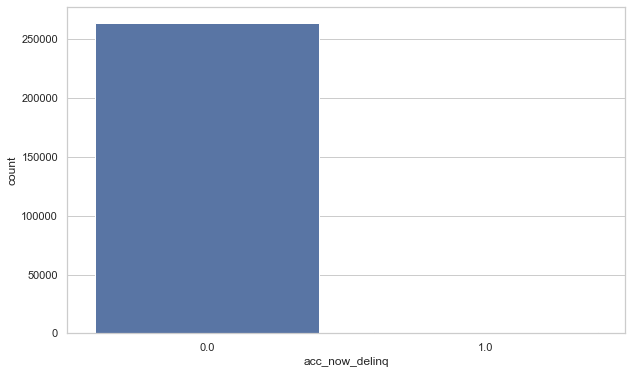

In [144]:
plt.figure(figsize = (10,6))
sns.countplot('acc_now_delinq', data = loan_acc_drop)

In [145]:
loan_acc_drop.loc[loan_acc_drop['acc_now_delinq'] == 0.0, 'acc_now_delinq'] = 0, # 연체계좌가 없으면 0
loan_acc_drop.loc[loan_acc_drop['acc_now_delinq'] > 0.0] = 1 # 연체계좌가 하나라도 있으면 1

In [146]:
loan_acc_drop['acc_now_delinq'].value_counts(dropna = False)

0.0    264162
1.0       887
Name: acc_now_delinq, dtype: int64

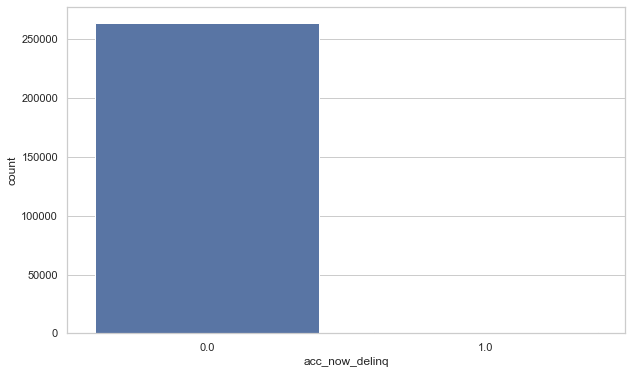

In [147]:
plt.figure(figsize = (10,6))
sns.countplot('acc_now_delinq', data = loan_acc_drop)

#### 총 Credit Line 수 (total_acc)

In [149]:
# 현재 대출자의 신용 파일에 있는 카드, 계좌 등을 포함한 credit line의 총 수
loan_acc_drop['total_acc'].value_counts(dropna = False)

20.0     9688
19.0     9656
17.0     9628
21.0     9529
18.0     9367
         ... 
128.0       1
111.0       1
106.0       1
120.0       1
127.0       1
Name: total_acc, Length: 120, dtype: int64

In [150]:
loan_acc_drop['total_acc'].isnull().sum() # 결측치 없음

0

In [153]:
# 대출자의 신용 파일에 "공개된" 카드, 계좌 등을 포함한 credit line의 수.
loan_acc_drop['open_acc'].value_counts(dropna = False)

9.0     22471
10.0    22063
8.0     21921
11.0    20335
7.0     20274
        ...  
61.0        1
82.0        1
74.0        1
76.0        1
64.0        1
Name: open_acc, Length: 67, dtype: int64

In [154]:
loan_acc_drop['open_acc'].isnull().sum() # 결측치 없음

0

Text(0.5, 1.0, 'Open Account')

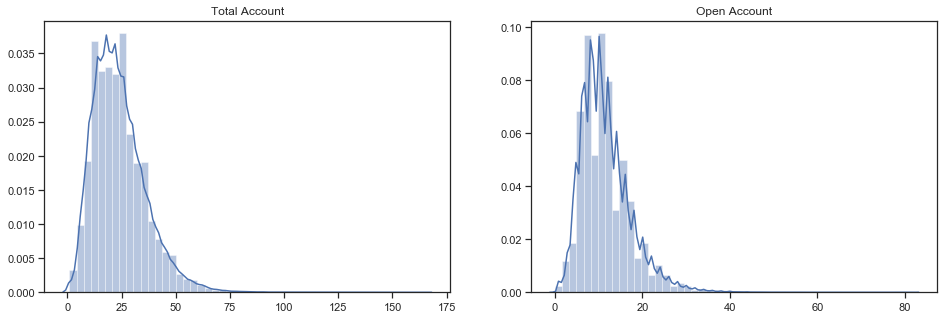

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.distplot(loan_acc_drop["total_acc"].values, ax = ax[0])
ax[0].set_title('Total Account')
sns.distplot(loan_acc_drop["open_acc"].values, ax = ax[1])
ax[1].set_title('Open Account')

#### hardship_flag, debt_settlement_flag

In [161]:
loan_acc_drop['hardship_flag'].value_counts(dropna = False)
# hardship plan: 직장을 잃었거나, 불의의 사고 등의 재정적 문제로 인해 대출금을 상환하지 못하는 사람들에게 
# 이자를 대폭 낮춰 상환 할 수 있도록 해주는 프로그램

N    264070
1       887
Y        92
Name: hardship_flag, dtype: int64

In [162]:
loan_acc_drop['debt_settlement_flag'].value_counts(dropna = False)
# charge-off한 대출자를 대출 조정 회사를 통해 추심하는지 여부

N    260754
Y      3408
1       887
Name: debt_settlement_flag, dtype: int64

Text(0.5, 1.0, 'Count Plot - debt_settlement_flag')

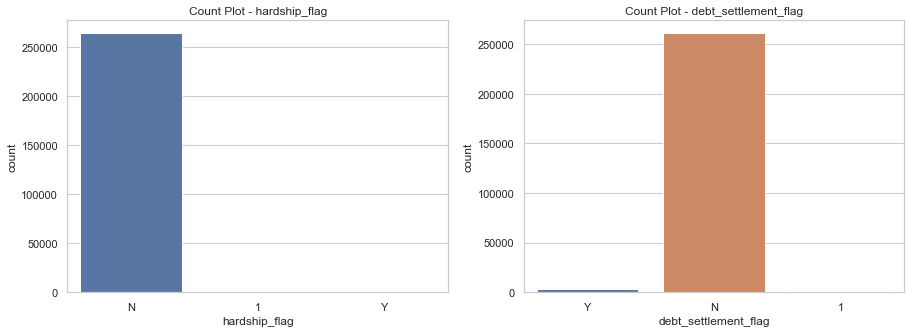

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('hardship_flag', data = loan_acc_drop, ax = ax[0]) 
ax[0].set_title('Count Plot - hardship_flag')
sns.countplot('debt_settlement_flag', data = loan_acc_drop, ax = ax[1]) 
ax[1].set_title('Count Plot - debt_settlement_flag')

#### FICO 점수 (fico_range_high, fico_range_low, last_fico_range_high, last_fico_range_low)

Text(0.5, 1.0, 'fico_range_high')

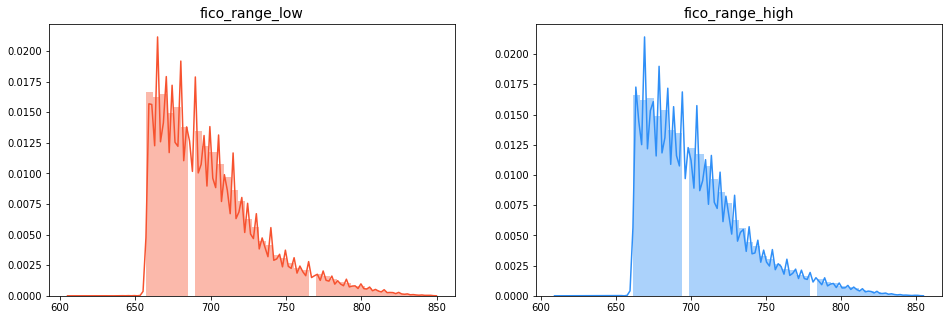

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))

fico_range_low = loan_acc["fico_range_low"].values # 
fico_range_high = loan_acc["fico_range_high"].values # 

sns.distplot(fico_range_low, ax = ax[0], color = "#F7522F")
ax[0].set_title("fico_range_low", fontsize=14)
sns.distplot(fico_range_high, ax = ax[1], color = "#2F8FF7")
ax[1].set_title("fico_range_high", fontsize=14)

#FICO scores range between 300 and 850. 
#In general, scores in the 670~739 range indicate "good" credit history and 
#most lenders will consider this score favorable. 
#In contrast, borrowers in the 580~669 range may find it difficult to obtain financing at attractive rates.
#To determine creditworthiness, lenders take a borrower's FICO score into account 
#but also consider other details such as income, 
#how long the borrower has been at their job, 
#and the type of credit requested.

Text(0.5, 1.0, 'last_fico_range_high')

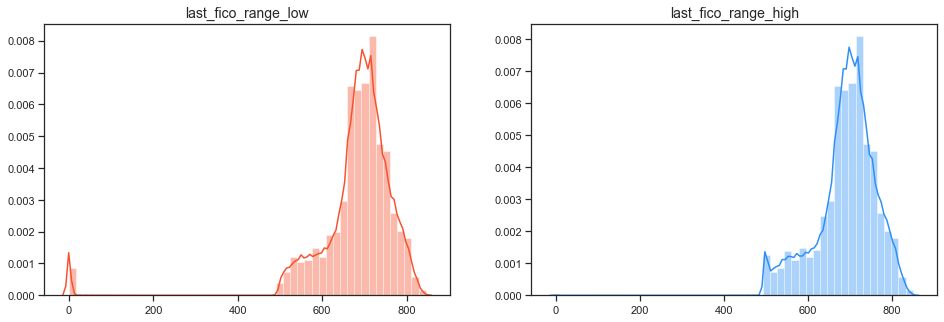

In [170]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))

fico_range_low = loan_acc["last_fico_range_low"].values # 
fico_range_high = loan_acc["last_fico_range_high"].values # 

sns.distplot(fico_range_low, ax = ax[0], color = "#F7522F")
ax[0].set_title("last_fico_range_low", fontsize = 14)
sns.distplot(fico_range_high, ax = ax[1], color = "#2F8FF7")
ax[1].set_title("last_fico_range_high", fontsize = 14)

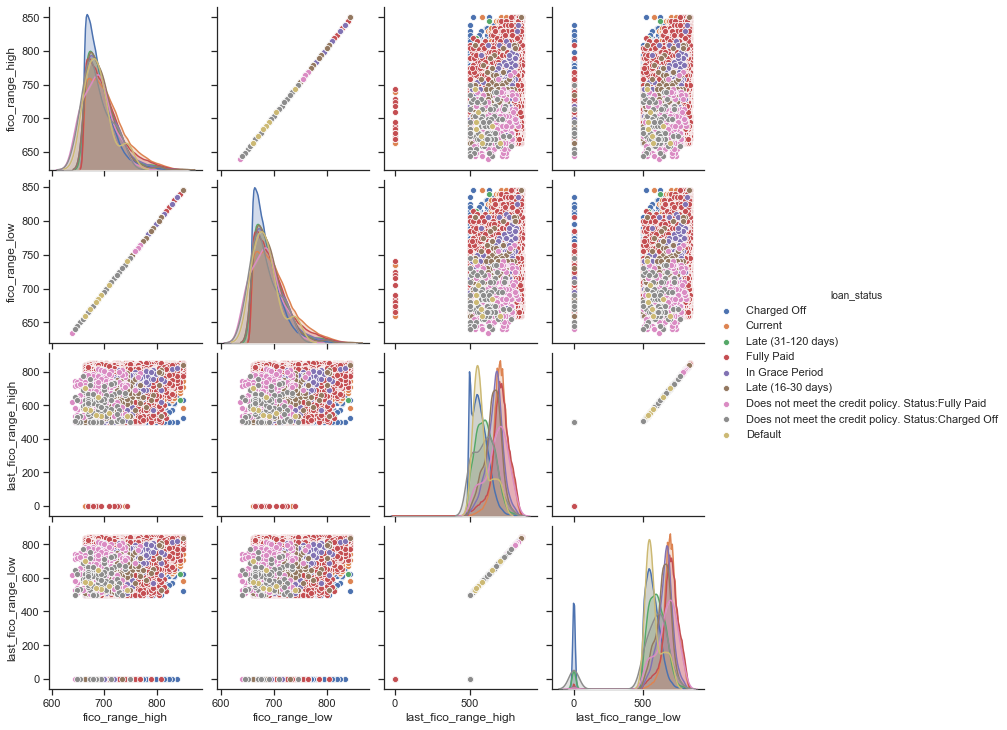

In [38]:
sns.set(style = "ticks")
sns.pairplot(loan_acc_drop, vars = ['fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low'], hue = "loan_status")

#### 대출상환계획 (pymnt_plan)

In [116]:
loan_acc_drop['pymnt_plan'].value_counts(dropna = False) # 결측치 없음

n    264980
y        71
Name: pymnt_plan, dtype: int64